In [1]:
from skimage import io
import numpy as np
%matplotlib inline

In [2]:
img1 = io.imread('Engineering.jpg')
img2 = io.imread('Engineering2.jpg')

In [3]:
def moravec(o_img, threshold):
    x = o_img.shape[0]
    y = o_img.shape[1]
    min_v = 1000.0*1000
    img = np.zeros((x, y), dtype=np.float)
    xy_shifts = [(1, 0), (1, 1), (1, -1), (0, 1), (0, -1), (-1, 1), (-1, 0), (-1, -1)]
    # for every pixel except edges
    for i in range(2, x-2):
        for j in range(2, y-2):
            for shift in xy_shifts:
                v = 0.0
                for k in range(-1, 2):
                    for l in range(-1, 2):
                        pixel1 = float(o_img[i + k, j + l])
                        pixel2 = float(o_img[i + k + shift[0], j + l + shift[1]])
                        diff = pixel2 - pixel1
                        diff = diff * diff
                        v += diff
                if v < min_v:
                    min_v = v
            if min_v < threshold:
                img[i, j] = 0
            else:
                img[i, j] = min_v
            min_v = 1000.0 * 1000
    return img

In [4]:
# non-maximal suppression gives a more accurate slim detailed result of the corners
# removing the excess unneeded marks
def non_maximal_suppression(c_img):
    x = c_img.shape[0]
    y = c_img.shape[1]
    img = np.zeros((x, y), dtype=np.float)
    xy_shifts = [(1, 0), (1, 1), (1, -1), (0, 1), (0, -1), (-1, 1), (-1, 0), (-1, -1)]
    # for every pixel
    for i in range(2, x-2):
        for j in range(2, y-2):
            for shift in xy_shifts:
                neighbor_pixel = c_img[i + shift[0], j + shift[1]]
                if c_img[i, j] <= neighbor_pixel:
                    img[i, j] = 1
                    break

    for i in range(2, x-2):
        for j in range(2, y-2):
            if img[i, j] == 1:
                c_img[i, j] = 0
    return c_img

In [5]:
def color_corners(o_im, c_im):
    I = np.dstack([o_im, o_im, o_im])
    x = c_im.shape[0]
    y = c_im.shape[1]
    for i in range(x):
        for j in range(y):
            if c_im[i, j] != 0:
                I[i, j, :] = [255, 0, 0]
    return I

In [6]:
def show_img(img):
    io.imshow(img)
    io.show()


def save_img(im, name):
    io.imsave(name, im)


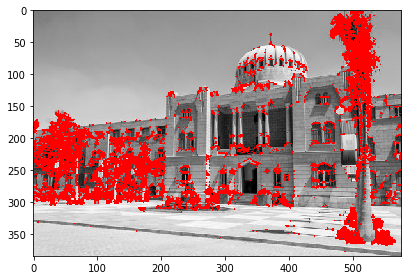

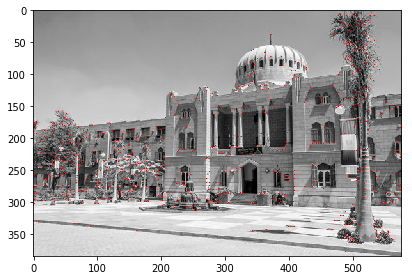

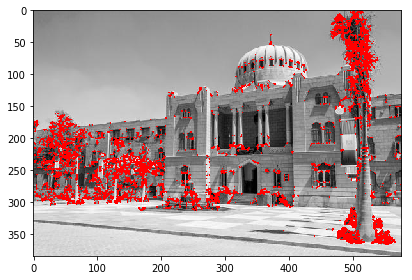

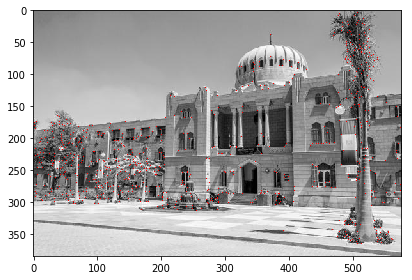

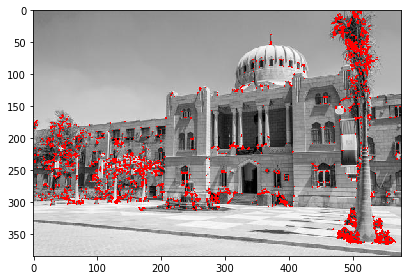

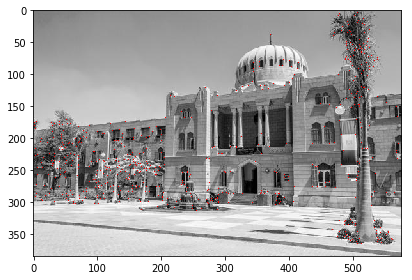

In [7]:
# Engineering img1 tests
img_before_supp = moravec(img1, 2000)
colored_corners = color_corners(img1, img_before_supp)
show_img(colored_corners)
save_img(colored_corners, 'Engineering_2k.jpg')
img_after_supp = non_maximal_suppression(img_before_supp)
colored_corners = color_corners(img1, img_after_supp)
show_img(colored_corners)
save_img(colored_corners, 'Engineering_2k_supp.jpg')

img_before_supp = moravec(img1, 4000)
colored_corners = color_corners(img1, img_before_supp)
show_img(colored_corners)
save_img(colored_corners, 'Engineering_4k.jpg')
img_after_supp = non_maximal_suppression(img_before_supp)
colored_corners = color_corners(img1, img_after_supp)
show_img(colored_corners)
save_img(colored_corners, 'Engineering_4k_supp.jpg')

img_before_supp = moravec(img1, 6000)
colored_corners = color_corners(img1, img_before_supp)
show_img(colored_corners)
save_img(colored_corners, 'Engineering_6k.jpg')
img_after_supp = non_maximal_suppression(img_before_supp)
colored_corners = color_corners(img1, img_after_supp)
show_img(colored_corners)
save_img(colored_corners, 'Engineering_6k_supp.jpg')

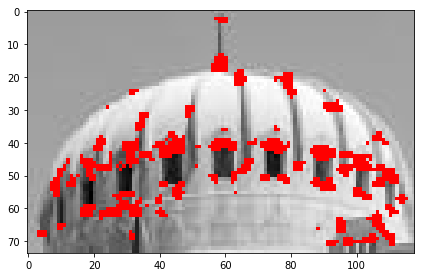

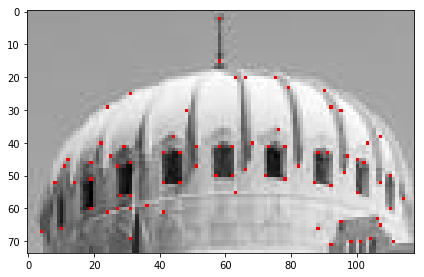

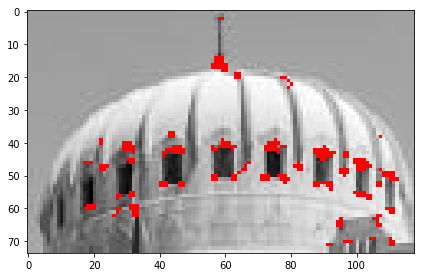

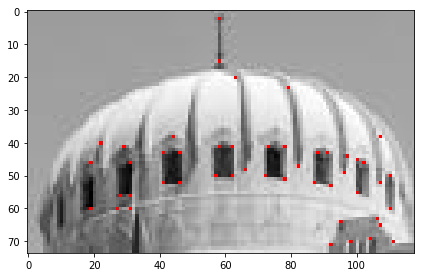

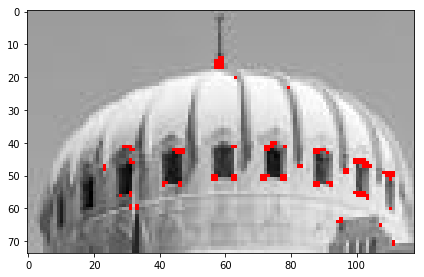

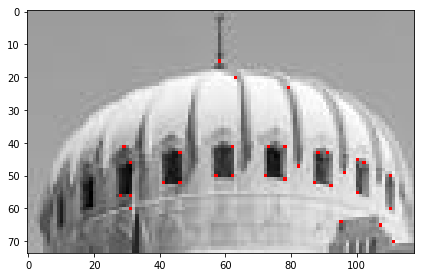

In [8]:
# Engineering2 img2 tests
img_before_supp = moravec(img2, 2000)
colored_corners = color_corners(img2, img_before_supp)
show_img(colored_corners)
save_img(colored_corners, 'Engineering2_2k.jpg')
img_after_supp = non_maximal_suppression(img_before_supp)
colored_corners = color_corners(img2, img_after_supp)
show_img(colored_corners)
save_img(colored_corners, 'Engineering2_2k_supp.jpg')

img_before_supp = moravec(img2, 4000)
colored_corners = color_corners(img2, img_before_supp)
show_img(colored_corners)
save_img(colored_corners, 'Engineering2_4k.jpg')
img_after_supp = non_maximal_suppression(img_before_supp)
colored_corners = color_corners(img2, img_after_supp)
show_img(colored_corners)
save_img(colored_corners, 'Engineering2_4k_supp.jpg')

img_before_supp = moravec(img2, 6000)
colored_corners = color_corners(img2, img_before_supp)
show_img(colored_corners)
save_img(colored_corners, 'Engineering2_6k.jpg')
img_after_supp = non_maximal_suppression(img_before_supp)
colored_corners = color_corners(img2, img_after_supp)
show_img(colored_corners)
save_img(colored_corners, 'Engineering2_6k_supp.jpg')